# Bài Toán Phân Cụm Dữ Liệu Đồng Hồ

Trong bài toán này, chúng ta sẽ thực hiện phân cụm dữ liệu đồng hồ dựa trên các đặc tính kỹ thuật, thương hiệu, và các thông số khác. Mục tiêu là tìm ra các nhóm tự nhiên trong dữ liệu để hiểu rõ hơn về phân khúc giá và đặc điểm của từng nhóm.

## Lý Thuyết Về Các Thuật Toán Phân Cụm

### 1. K-Prototypes
- **Mô tả**: K-Prototypes là một thuật toán phân cụm được thiết kế để xử lý dữ liệu hỗn hợp (cả số và phân loại).
- **Cách hoạt động**:
  - Kết hợp K-Means (cho dữ liệu số) và K-Modes (cho dữ liệu phân loại).
  - Sử dụng khoảng cách Euclidean cho dữ liệu số và khoảng cách Hamming cho dữ liệu phân loại.
- **Ưu điểm**: Phù hợp với dữ liệu hỗn hợp.
- **Nhược điểm**: Cần xác định số cụm trước.

### 2. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
- **Mô tả**: DBSCAN là thuật toán phân cụm dựa trên mật độ, có khả năng phát hiện cụm với hình dạng bất kỳ và nhận diện nhiễu.
- **Cách hoạt động**:
  - Định nghĩa hai tham số: epsilon (ε) - bán kính vùng lân cận và minPts - số điểm tối thiểu trong vùng lân cận.
  - Phân loại điểm thành ba loại: core point, border point và noise point.
  - Mở rộng cụm từ các core point bằng cách kết nối các điểm mật độ-đạt-được (density-reachable).
- **Ưu điểm**: 
  - Không cần xác định số cụm trước.
  - Phát hiện được nhiễu (outliers).
  - Tìm được cụm với hình dạng bất kỳ.
- **Nhược điểm**: 
  - Nhạy cảm với tham số đầu vào (ε, minPts).
  - Khó xử lý dữ liệu có mật độ thay đổi.

### 3. GMM (Gaussian Mixture Model)
- **Mô tả**: GMM là một thuật toán phân cụm xác suất, giả định dữ liệu được sinh ra từ hỗn hợp của nhiều phân phối chuẩn (Gaussian).
- **Cách hoạt động**:
  - Mỗi cụm được mô hình hóa bằng một phân phối chuẩn với các tham số trung bình (μ), ma trận hiệp phương sai (Σ) và trọng số (π).
  - Sử dụng thuật toán Expectation-Maximization (EM) để ước lượng các tham số này.
  - Mỗi điểm dữ liệu có xác suất thuộc về mỗi cụm, điểm được gán vào cụm có xác suất cao nhất.
- **Ưu điểm**:
  - Có thể nhận diện cụm với hình dạng elip (không chỉ hình cầu như K-means).
  - Cung cấp thông tin xác suất về việc điểm dữ liệu thuộc cụm nào.
  - Phù hợp với dữ liệu có phân phối chuẩn.
- **Nhược điểm**:
  - Cần xác định số cụm trước.
  - Nhạy cảm với điểm khởi tạo.
  - Kém hiệu quả với dữ liệu phân loại.

## Lý Thuyết Về Các Phương Pháp Mã Hóa

### 1. Label Encoding
- **Mô tả**: Chuyển đổi các giá trị phân loại thành số nguyên.
- **Ưu điểm**: Đơn giản, dễ triển khai.
- **Nhược điểm**: Có thể gây hiểu nhầm về thứ tự giữa các giá trị.

### 2. One-Hot Encoding
- **Mô tả**: Tạo một cột nhị phân (0 hoặc 1) cho mỗi giá trị phân loại.
- **Ưu điểm**: Tránh được vấn đề thứ tự giả.
- **Nhược điểm**: Làm tăng số chiều dữ liệu.

### 3. Target Encoding
- **Mô tả**: Thay thế các giá trị phân loại bằng trung bình của cột mục tiêu.
- **Ưu điểm**: Giữ được thông tin từ cột mục tiêu.
- **Nhược điểm**: Có thể gây overfitting.

## Lý Thuyết Về Các Metrics Đánh Giá

### 1. Silhouette Score
- **Mô tả**: Đánh giá mức độ tách biệt giữa các cụm và sự gắn kết trong từng cụm.
- **Giá trị**: Nằm trong khoảng [-1, 1]. Giá trị càng cao càng tốt.

### 2. Davies-Bouldin Index
- **Mô tả**: Đánh giá sự phân tách và độ nhỏ gọn của các cụm.
- **Giá trị**: Giá trị càng nhỏ càng tốt.

### 3. Calinski-Harabasz Index
- **Mô tả**: Đánh giá tỷ lệ giữa độ phân tán giữa các cụm và trong từng cụm.
- **Giá trị**: Giá trị càng lớn càng tốt.

In [1]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from kmodes.kprototypes import KPrototypes
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.mixture import GaussianMixture
import warnings
warnings.filterwarnings('ignore')

# Thiết lập style cho các biểu đồ
sns.set_style("whitegrid")  # Using direct seaborn styling instead of plt.style.use
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

## 1. Khám Phá Dữ Liệu (Exploratory Data Analysis)

Trước tiên, chúng ta cần đọc dữ liệu và tìm hiểu cấu trúc của nó để có thể tiền xử lý phù hợp.

In [2]:
# Đọc dữ liệu
file_path = '../dataset/train_segmented.csv'
df = pd.read_csv(file_path)

# Hiển thị thông tin cơ bản về dữ liệu
print("=== THÔNG TIN CƠ BẢN VỀ DỮ LIỆU ===")
print(f"Số lượng mẫu: {df.shape[0]}")
print(f"Số lượng đặc trưng: {df.shape[1]}")
print("\n=== KIỂM TRA KIỂU DỮ LIỆU ===")
print(df.info())

print("\n=== THỐNG KÊ MÔ TẢ CHO DỮ LIỆU SỐ ===")
print(df.describe())

print("\n=== SỐ LƯỢNG GIÁ TRỊ DUY NHẤT TRONG MỖI CỘT ===")
unique_counts = df.nunique().sort_values(ascending=False)
print(unique_counts)

# Kiểm tra giá trị null
print("\n=== KIỂM TRA GIÁ TRỊ NULL ===")
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0] if any(null_counts > 0) else "Không có giá trị null")

=== THÔNG TIN CƠ BẢN VỀ DỮ LIỆU ===
Số lượng mẫu: 5665
Số lượng đặc trưng: 15

=== KIỂM TRA KIỂU DỮ LIỆU ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5665 entries, 0 to 5664
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   case_material     5665 non-null   object 
 1   band_material     5665 non-null   object 
 2   case_back         5665 non-null   object 
 3   bezel_material    5665 non-null   object 
 4   brand             5665 non-null   object 
 5   gender            5665 non-null   object 
 6   movement          5665 non-null   object 
 7   watch_style       5665 non-null   object 
 8   case_thickness    5665 non-null   float64
 9   crystal           5665 non-null   object 
 10  hands             5665 non-null   object 
 11  dial_markers      5665 non-null   object 
 12  case_diameter     5665 non-null   float64
 13  water_resistance  5665 non-null   float64
 14  price_segment     5665 non-

### Phân tích phân phối của các đặc trưng số

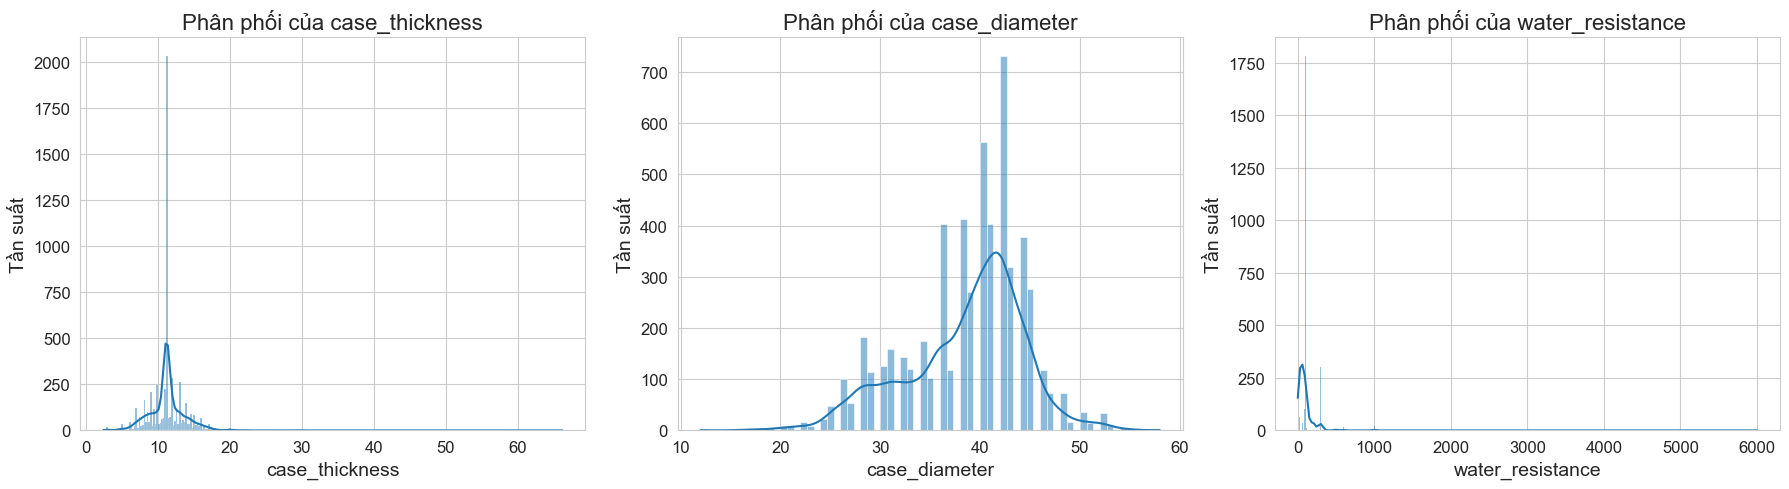

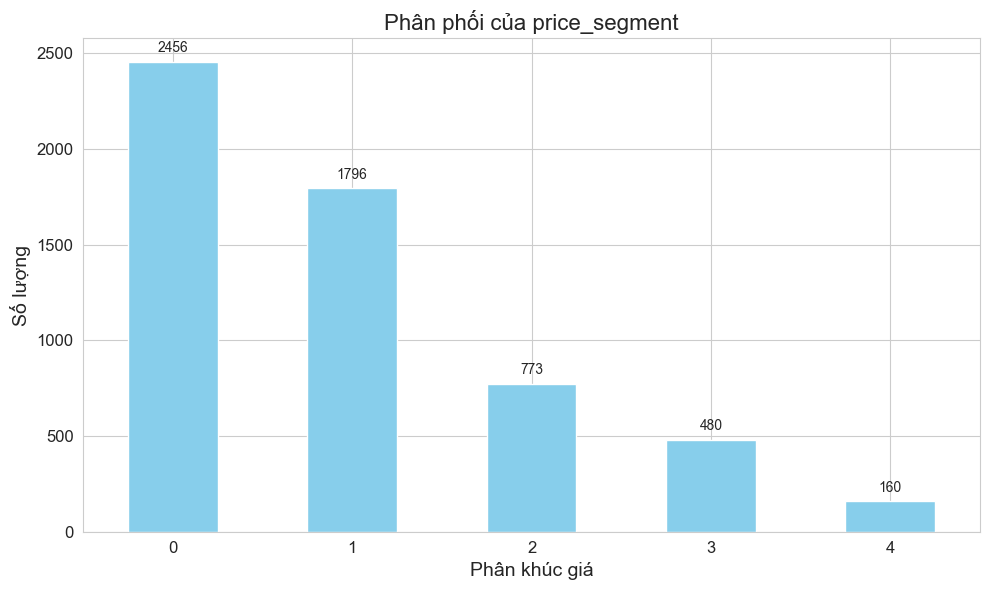

In [3]:
# Phân tích phân phối của các đặc trưng số
numerical_features = ['case_thickness', 'case_diameter', 'water_resistance']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Phân phối của {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Tần suất')

plt.tight_layout()
plt.show()

# Biểu đồ phân phối của price_segment
plt.figure(figsize=(10, 6))
segment_counts = df['price_segment'].value_counts().sort_index()
ax = segment_counts.plot(kind='bar', color='skyblue')
plt.title('Phân phối của price_segment')
plt.xlabel('Phân khúc giá')
plt.ylabel('Số lượng')
plt.xticks(rotation=0)

# Thêm số lượng trên mỗi cột
for i, v in enumerate(segment_counts):
    ax.text(i, v + 50, str(v), ha='center')

plt.tight_layout()
plt.show()

### Phân tích mối quan hệ giữa các đặc trưng số

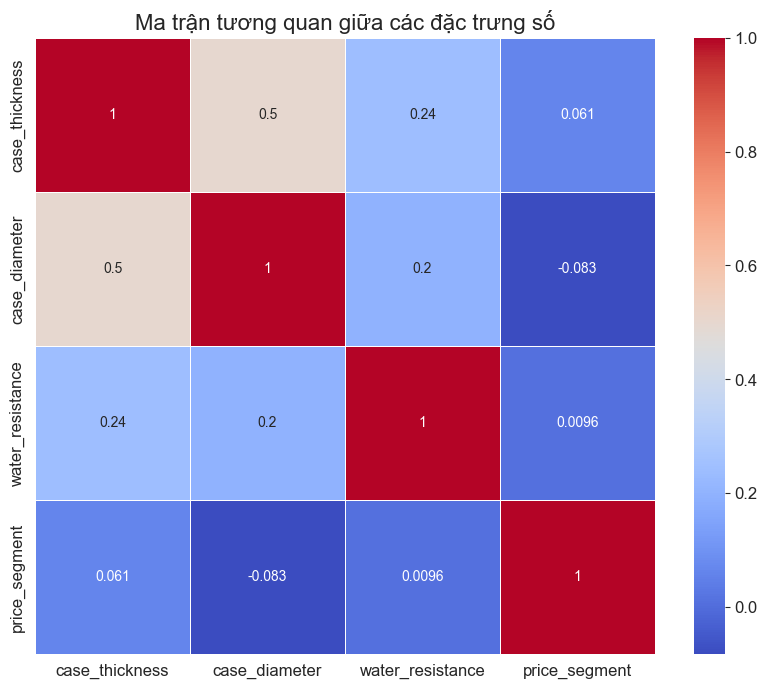

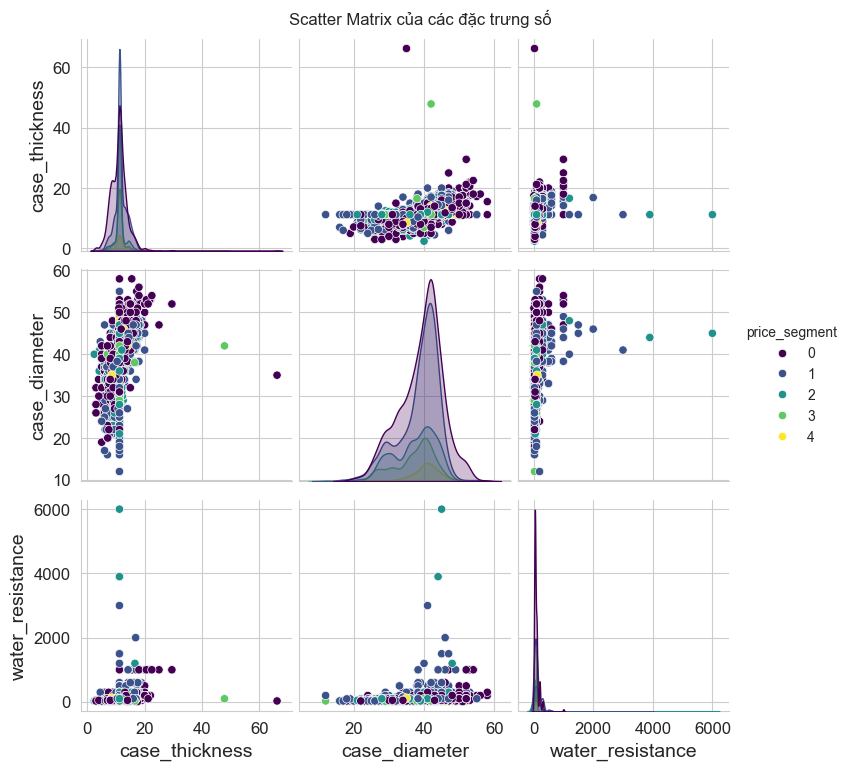

In [4]:
# Phân tích mối quan hệ giữa các đặc trưng số
plt.figure(figsize=(10, 8))
numerical_df = df[numerical_features + ['price_segment']]
correlation = numerical_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Ma trận tương quan giữa các đặc trưng số')
plt.show()

# Biểu đồ scatter matrix để xem mối quan hệ giữa các đặc trưng số
sns.pairplot(numerical_df, hue='price_segment', palette='viridis')
plt.suptitle('Scatter Matrix của các đặc trưng số', y=1.02)
plt.show()

### Phân tích đặc trưng phân loại

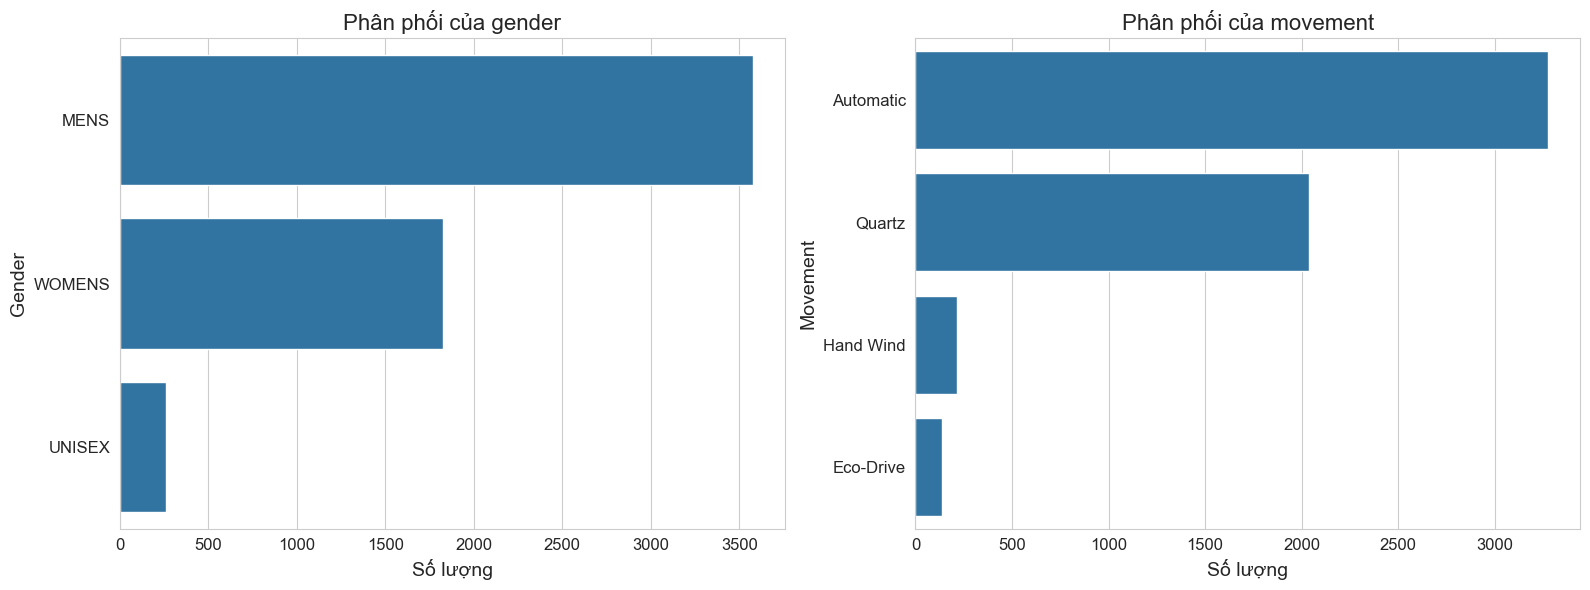

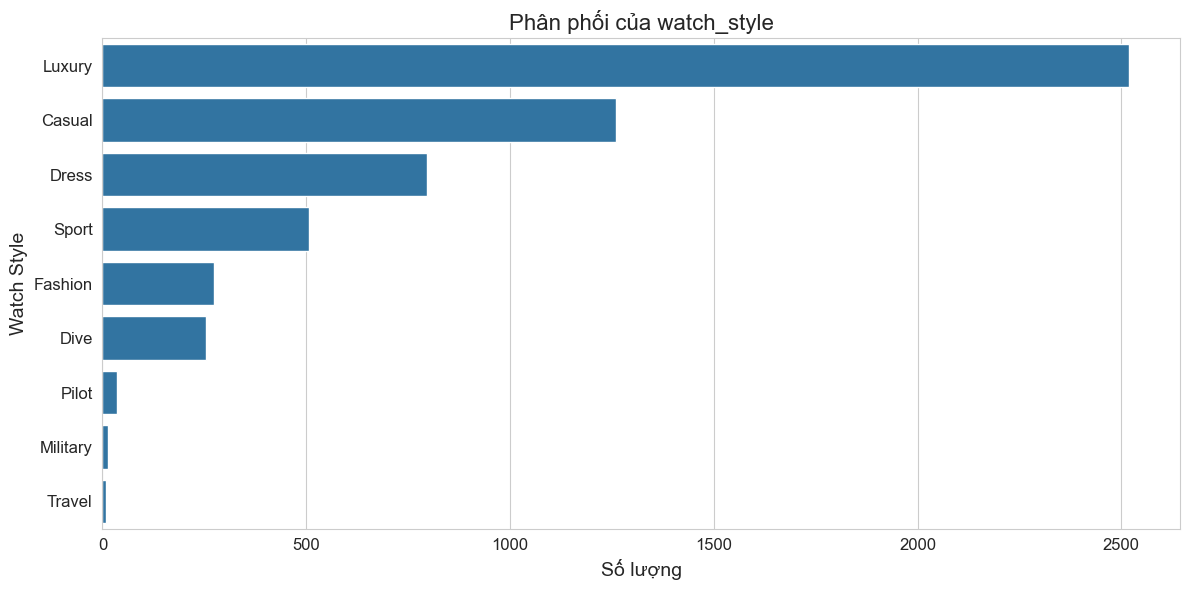

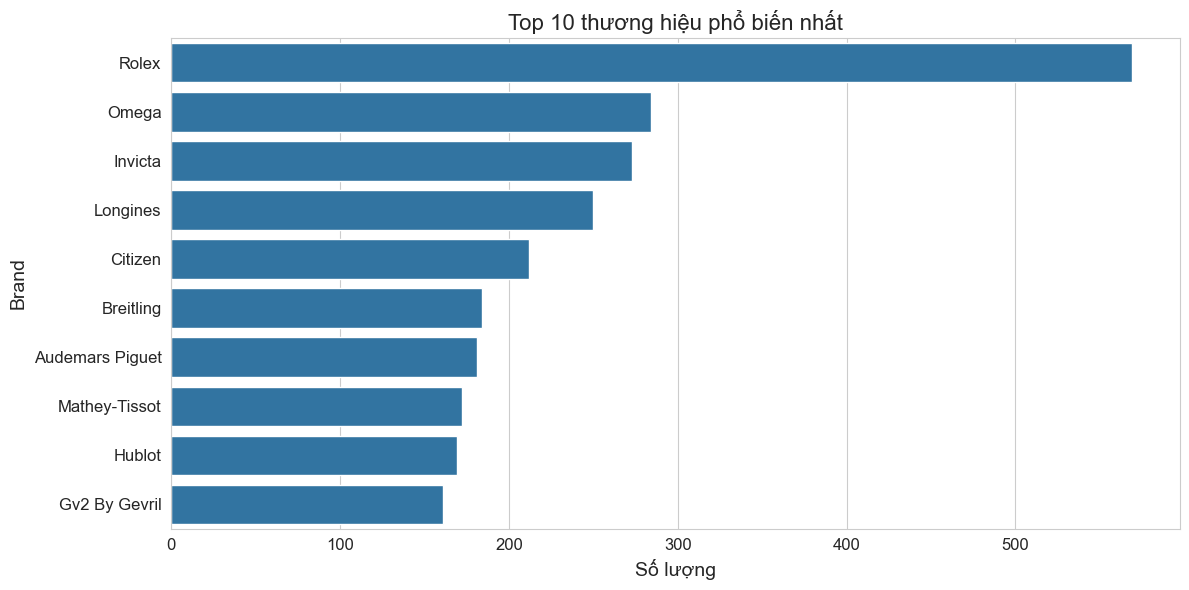

In [5]:
# Phân tích các đặc trưng phân loại
categorical_features = ['case_material', 'band_material', 'case_back', 'bezel_material', 
                        'brand', 'gender', 'movement', 'watch_style', 'crystal', 
                        'hands', 'dial_markers']

# Hiển thị phân phối của 'gender' và 'movement'
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(y=df['gender'], ax=axes[0], order=df['gender'].value_counts().index)
axes[0].set_title('Phân phối của gender')
axes[0].set_xlabel('Số lượng')
axes[0].set_ylabel('Gender')

sns.countplot(y=df['movement'], ax=axes[1], order=df['movement'].value_counts().index)
axes[1].set_title('Phân phối của movement')
axes[1].set_xlabel('Số lượng')
axes[1].set_ylabel('Movement')

plt.tight_layout()
plt.show()

# Hiển thị phân phối của 'watch_style'
plt.figure(figsize=(12, 6))
sns.countplot(y=df['watch_style'], order=df['watch_style'].value_counts().index)
plt.title('Phân phối của watch_style')
plt.xlabel('Số lượng')
plt.ylabel('Watch Style')
plt.tight_layout()
plt.show()

# Phân tích top 10 thương hiệu phổ biến nhất
plt.figure(figsize=(12, 6))
top_brands = df['brand'].value_counts().nlargest(10)
sns.barplot(x=top_brands.values, y=top_brands.index)
plt.title('Top 10 thương hiệu phổ biến nhất')
plt.xlabel('Số lượng')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()

### Phân tích mối quan hệ giữa đặc trưng phân loại và price_segment

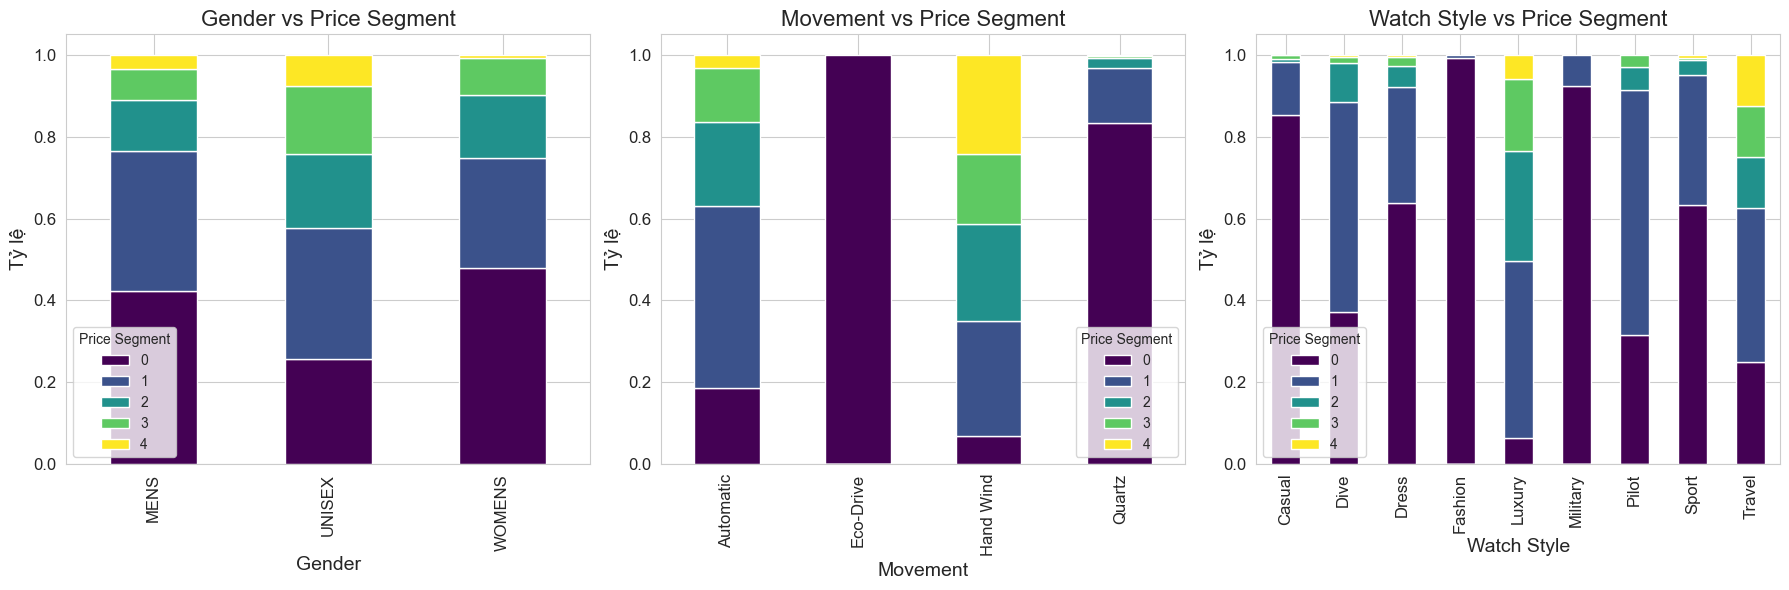

<Figure size 1400x800 with 0 Axes>

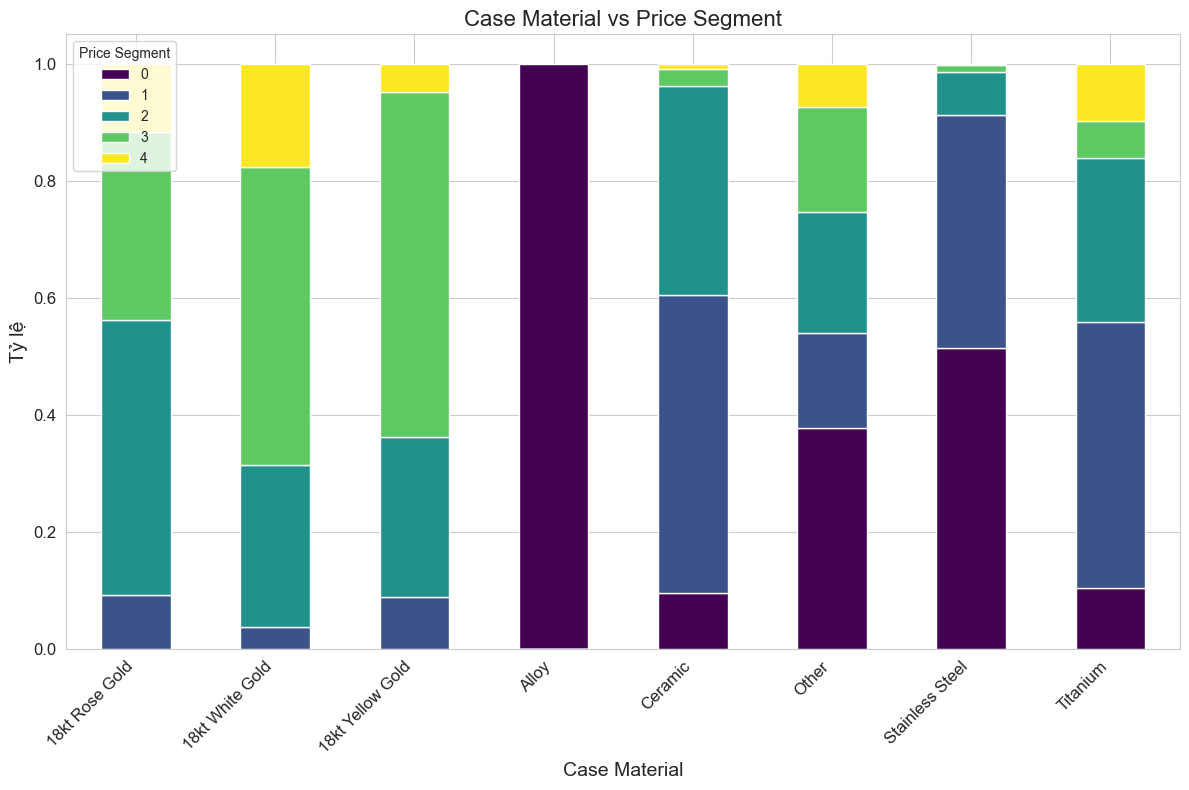

In [6]:
# Phân tích mối quan hệ giữa 'gender', 'movement', 'watch_style' và 'price_segment'
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Gender vs price_segment
gender_price = pd.crosstab(df['gender'], df['price_segment'], normalize='index')
gender_price.plot(kind='bar', stacked=True, ax=axes[0], colormap='viridis')
axes[0].set_title('Gender vs Price Segment')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Tỷ lệ')
axes[0].legend(title='Price Segment')

# Movement vs price_segment
movement_price = pd.crosstab(df['movement'], df['price_segment'], normalize='index')
movement_price.plot(kind='bar', stacked=True, ax=axes[1], colormap='viridis')
axes[1].set_title('Movement vs Price Segment')
axes[1].set_xlabel('Movement')
axes[1].set_ylabel('Tỷ lệ')
axes[1].legend(title='Price Segment')

# Watch Style vs price_segment
style_price = pd.crosstab(df['watch_style'], df['price_segment'], normalize='index')
style_price.plot(kind='bar', stacked=True, ax=axes[2], colormap='viridis')
axes[2].set_title('Watch Style vs Price Segment')
axes[2].set_xlabel('Watch Style')
axes[2].set_ylabel('Tỷ lệ')
axes[2].legend(title='Price Segment')

plt.tight_layout()
plt.show()

# Phân tích mối quan hệ giữa case_material và price_segment
plt.figure(figsize=(14, 8))
case_material_price = pd.crosstab(df['case_material'].apply(lambda x: x if df['case_material'].value_counts()[x] > 100 else 'Other'), 
                                 df['price_segment'], normalize='index')
case_material_price.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Case Material vs Price Segment')
plt.xlabel('Case Material')
plt.ylabel('Tỷ lệ')
plt.legend(title='Price Segment')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 2. Tiền Xử Lý Dữ Liệu

Trong phần này, chúng ta sẽ:
1. Phân loại các cột thành dữ liệu số và dữ liệu phân loại
2. Chuẩn hóa dữ liệu số bằng MinMaxScaler
3. Mã hóa dữ liệu phân loại bằng các phương pháp khác nhau

### ✅ 1. Mã hóa dữ liệu cho K-Prototypes (df_kproto)

In [7]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Các cột số & phân loại
numerical_cols = ['case_thickness', 'case_diameter', 'water_resistance']
onehot_cols = ['gender', 'movement', 'watch_style']
categorical_cols = ['case_material', 'band_material', 'case_back', 'bezel_material', 
                    'brand', 'crystal', 'hands', 'dial_markers']
k_categorical_cols = onehot_cols + categorical_cols

# Scale dữ liệu số
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Category pooling (gộp nhóm các giá trị hiếm)
def pool_categories(series, threshold=0.01):
    value_counts = series.value_counts(normalize=True)
    rare = value_counts[value_counts < threshold].index
    return series.apply(lambda x: 'Other' if x in rare else x)

# Gộp giá trị hiếm
df_pooled = df.copy()
high_card_cols = [col for col in categorical_cols if df[col].nunique() > 50]
for col in high_card_cols:
    df_pooled[col] = pool_categories(df[col])

# Label Encoding
df_kproto_improved = df_pooled.copy()
label_encoders_improved = {}
for col in k_categorical_cols:
    le = LabelEncoder()
    df_kproto_improved[col] = le.fit_transform(df_kproto_improved[col])
    label_encoders_improved[col] = le

df_kproto = df_kproto_improved.copy()

print("\n=== KIỂM TRA DỮ LIỆU SAU KHI TIỀN XỬ LÝ CẢI TIẾN ===")
print("Dữ liệu cho K-Prototypes với category pooling:")
print(df_kproto.head())



=== KIỂM TRA DỮ LIỆU SAU KHI TIỀN XỬ LÝ CẢI TIẾN ===
Dữ liệu cho K-Prototypes với category pooling:
   case_material  band_material  case_back  bezel_material  brand  gender  \
0              7              6         45               1      1       2   
1              7              9         28               9      8       0   
2              7              8         28               9     29       0   
3              7              6         28               8     20       2   
4              7              9         28               9     16       0   

   movement  watch_style  case_thickness  crystal  hands  dial_markers  \
0         0            4        0.100313        4     12             4   
1         3            7        0.111285        1     13             4   
2         3            7        0.147335        4     12             4   
3         3            4        0.086207        3     13             6   
4         3            0        0.137871        3     13          

### ✅ 2. Mã hóa dữ liệu cho DBSCAN (df_onehot)

In [8]:
from sklearn.preprocessing import OneHotEncoder

# Frequency Encoding cho các cột high-card
df_freq_encoded = df.copy()
for col in high_card_cols:
    freq_map = df[col].value_counts(normalize=True).to_dict()
    df_freq_encoded[col] = df[col].map(freq_map)

# One-hot Encoding cho các cột onehot
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
onehot_encoded = pd.DataFrame(
    onehot_encoder.fit_transform(df_pooled[onehot_cols]),
    columns=onehot_encoder.get_feature_names_out(onehot_cols)
)

# Kết hợp dữ liệu số + onehot + freq
df_dbscan = pd.concat([
    df[numerical_cols],
    onehot_encoded,
    df_freq_encoded[high_card_cols]
], axis=1)

df_onehot = df_dbscan.copy()

print("\n=== KIỂM TRA DỮ LIỆU SAU KHI TIỀN XỬ LÝ CẢI TIẾN ===")
print("\nDữ liệu cho DBSCAN với frequency encoding:")
print(df_onehot.head())



=== KIỂM TRA DỮ LIỆU SAU KHI TIỀN XỬ LÝ CẢI TIẾN ===

Dữ liệu cho DBSCAN với frequency encoding:
   case_thickness  case_diameter  water_resistance  gender_UNISEX  \
0        0.100313       0.478261          0.007837            0.0   
1        0.111285       0.565217          0.007837            0.0   
2        0.147335       0.717391          0.016175            0.0   
3        0.086207       0.391304          0.004502            0.0   
4        0.137871       0.608696          0.007837            0.0   

   gender_WOMENS  movement_Eco-Drive  movement_Hand Wind  movement_Quartz  \
0            1.0                 0.0                 0.0              0.0   
1            0.0                 0.0                 0.0              1.0   
2            0.0                 0.0                 0.0              1.0   
3            1.0                 0.0                 0.0              1.0   
4            0.0                 0.0                 0.0              1.0   

   watch_style_Dive  wat

In [9]:
# # Xử lý đặc trưng phân loại có độ phân tán cao (high-cardinality)
# # Phương pháp 1: Frequency Encoding - mã hóa theo tần suất xuất hiện
# print("Áp dụng Frequency Encoding cho các đặc trưng có độ phân tán cao...")
# high_card_cols = [col for col in categorical_cols if df[col].nunique() > 50]
# print(f"Các đặc trưng có độ phân tán cao: {high_card_cols}")

# # Tạo DataFrame mới cho các phương pháp mã hóa
# df_freq_encoded = df.copy()

# # Áp dụng frequency encoding
# for col in high_card_cols:
#     # Tính tần suất của mỗi giá trị
#     freq_map = df[col].value_counts(normalize=True).to_dict()
#     # Áp dụng mã hóa
#     df_freq_encoded[col] = df[col].map(freq_map)
#     print(f"Hoàn thành frequency encoding cho {col}")

# # Phương pháp 2: Category Pooling - nhóm các giá trị hiếm gặp
# print("\nÁp dụng Category Pooling cho các đặc trưng có độ phân tán cao...")
# df_pooled = df.copy()

# def pool_categories(series, threshold=0.01):
#     """Nhóm các giá trị hiếm gặp vào category 'Other'"""
#     value_counts = series.value_counts(normalize=True)
#     # Các giá trị có tần suất dưới ngưỡng
#     mask = value_counts < threshold
#     rare_categories = value_counts[mask].index.tolist()
#     # Tạo series mới với các giá trị hiếm được nhóm lại
#     new_series = series.copy()
#     new_series[series.isin(rare_categories)] = 'Other'
#     return new_series

# # Áp dụng category pooling
# for col in high_card_cols:
#     df_pooled[col] = pool_categories(df[col])
#     print(f"Hoàn thành category pooling cho {col}. Số giá trị duy nhất giảm từ {df[col].nunique()} xuống {df_pooled[col].nunique()}")

# # Phương pháp 3: Kết hợp Category Pooling và Label Encoding cho K-Prototypes
# df_kproto_improved = df_pooled.copy()
# label_encoders_improved = {}

# for col in k_categorical_cols:
#     le = LabelEncoder()
#     df_kproto_improved[col] = le.fit_transform(df_kproto_improved[col])
#     label_encoders_improved[col] = le
# print("\nHoàn thành mã hóa dữ liệu cho K-Prototypes với category pooling.")

# # Phương pháp 4: Kết hợp Frequency Encoding với One-Hot Encoding cho DBSCAN
# print("\nKết hợp Frequency Encoding và One-Hot Encoding cho DBSCAN...")

# # Kết hợp tất cả
# df_dbscan = pd.concat([
#     # Đặc trưng số đã được chuẩn hóa
#     df[numerical_cols],
#     # Đặc trưng phân loại có độ phân tán thấp -> one-hot encoding
#     pd.get_dummies(df_pooled[onehot_cols], drop_first=True),
#     # Đặc trưng phân loại có độ phân tán cao -> frequency encoding
#     df_freq_encoded[high_card_cols]
# ], axis=1)

# print(f"Số lượng đặc trưng sau khi kết hợp encoding: {df_dbscan.shape[1]}")

# # Lưu các DataFrame đã xử lý
# df_kproto_original = df_kproto.copy()  # Lưu lại phương pháp gốc để so sánh
# df_kproto = df_kproto_improved  # Cập nhật df_kproto với phiên bản cải tiến
# df_onehot = df_dbscan  # Cập nhật df_onehot với phiên bản cải tiến cho DBSCAN

# # Kiểm tra dữ liệu sau khi tiền xử lý
# print("\n=== KIỂM TRA DỮ LIỆU SAU KHI TIỀN XỬ LÝ CẢI TIẾN ===")
# print("Dữ liệu cho K-Prototypes với category pooling:")
# print(df_kproto.head())
# print("\nDữ liệu cho DBSCAN với frequency encoding:")
# print(df_onehot.head())

# # save processed data
# df_kproto.to_csv('../dataset/train_segmented_kproto.csv', index=False)
# df_onehot.to_csv('../dataset/train_segmented_dbscan.csv', index=False)


### Phân tích dữ liệu sau khi mã hóa



Sau khi áp dụng các phương pháp mã hóa khác nhau cho đặc trưng phân loại có độ phân tán cao, chúng ta có thể so sánh hiệu quả của từng phương pháp:

1. **Frequency Encoding**: Biến đổi mỗi giá trị thành tần suất xuất hiện của nó trong tập dữ liệu. Phương pháp này giữ được thông tin về mức độ phổ biến của mỗi giá trị.

2. **Category Pooling**: Nhóm các giá trị hiếm gặp vào một nhóm "Other", giúp giảm đáng kể số lượng giá trị duy nhất mà không làm mất quá nhiều thông tin.

3. **Kết hợp Category Pooling và Label Encoding cho K-Prototypes**: Phù hợp với thuật toán K-Prototypes, giúp giảm số lượng giá trị duy nhất nhưng vẫn giữ được tính chất phân loại.

4. **Kết hợp Frequency Encoding với One-Hot Encoding cho DBSCAN**: Áp dụng one-hot encoding cho đặc trưng phân loại có ít giá trị duy nhất và frequency encoding cho đặc trưng có độ phân tán cao.

Những phương pháp này giúp giảm đáng kể chiều dữ liệu so với việc áp dụng one-hot encoding cho tất cả đặc trưng phân loại, đồng thời vẫn giữ được thông tin quan trọng trong dữ liệu.

In [10]:
# # Áp dụng PCA để giảm chiều dữ liệu cho DBSCAN
# print("Áp dụng PCA để giảm chiều dữ liệu...")
# from sklearn.decomposition import PCA

# # Số lượng thành phần chính cần giữ lại
# n_components = min(15, df_onehot.shape[1])  # Giữ tối đa 15 thành phần hoặc ít hơn nếu số đặc trưng < 15

# # Áp dụng PCA
# pca = PCA(n_components=n_components)
# pca_result = pca.fit_transform(df_onehot)

# # Tạo DataFrame mới từ kết quả PCA
# df_pca = pd.DataFrame(
#     pca_result,
#     columns=[f'PC{i+1}' for i in range(n_components)]
# )

# # Hiển thị tỷ lệ phương sai giải thích được
# explained_variance = pca.explained_variance_ratio_
# cumulative_variance = np.cumsum(explained_variance)

# print(f"\nTỷ lệ phương sai giải thích được bởi mỗi thành phần chính:")
# for i, var in enumerate(explained_variance):
#     print(f"PC{i+1}: {var:.4f} ({cumulative_variance[i]:.4f} tích lũy)")

# # Vẽ biểu đồ scree plot để xác định số lượng thành phần chính phù hợp
# plt.figure(figsize=(12, 5))
# plt.subplot(1, 2, 1)
# plt.bar(range(1, len(explained_variance) + 1), explained_variance)
# plt.plot(range(1, len(explained_variance) + 1), explained_variance, 'ro-')
# plt.xlabel('Thành phần chính')
# plt.ylabel('Tỷ lệ phương sai giải thích')
# plt.title('Scree Plot')

# plt.subplot(1, 2, 2)
# plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'bo-')
# plt.xlabel('Số lượng thành phần chính')
# plt.ylabel('Tỷ lệ phương sai tích lũy')
# plt.axhline(y=0.8, color='r', linestyle='--')
# plt.title('Tỷ lệ phương sai tích lũy')

# plt.tight_layout()
# plt.show()

# # Chọn số lượng thành phần chính dựa trên tỷ lệ phương sai tích lũy
# threshold = 0.8  # Ngưỡng tỷ lệ phương sai tích lũy
# optimal_n_components = np.argmax(cumulative_variance >= threshold) + 1
# print(f"\nSố lượng thành phần chính tối ưu (giải thích {threshold*100}% phương sai): {optimal_n_components}")

# # Cập nhật df_pca với số lượng thành phần chính tối ưu
# df_pca = df_pca.iloc[:, :optimal_n_components]
# print(df_pca.head())
# print(f"Kích thước dữ liệu sau khi áp dụng PCA: {df_pca.shape}")

## 3. Triển Khai Các Mô Hình Phân Cụm

Chúng ta sẽ triển khai hai mô hình phân cụm: K-Prototypes và DBSCAN.

### 3.1. Xác định số cụm tối ưu

Trước khi áp dụng các thuật toán phân cụm, chúng ta cần xác định số cụm tối ưu. Chúng ta sẽ sử dụng phương pháp Elbow và Silhouette Score.

Đang tính toán phương pháp Elbow cho K-Prototypes...
All categorical columns: ['case_material', 'band_material', 'case_back', 'bezel_material', 'brand', 'crystal', 'hands', 'dial_markers', 'gender', 'movement', 'watch_style']
Categorical column indices: [0, 1, 2, 3, 4, 9, 10, 11, 5, 6, 7]

Column data types:
case_material         int64
band_material         int64
case_back             int64
bezel_material        int64
brand                 int64
gender                int64
movement              int64
watch_style           int64
case_thickness      float64
crystal               int64
hands                 int64
dial_markers          int64
case_diameter       float64
water_resistance    float64
price_segment         int64
dtype: object
Running K-Prototypes with k=2...
K = 2, Cost = 6570.62982270631
Running K-Prototypes with k=3...
K = 3, Cost = 5184.390956944174
Running K-Prototypes with k=4...
K = 4, Cost = 4620.403883740255
Running K-Prototypes with k=5...
K = 5, Cost = 4479.8547599740

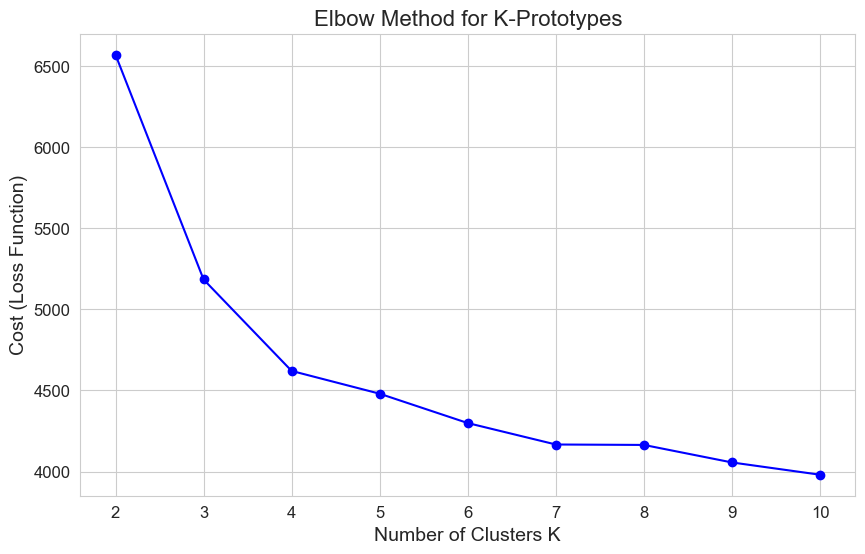

In [11]:
# Phương pháp Elbow cho K-Prototypes
print("Đang tính toán phương pháp Elbow cho K-Prototypes...")

# Combine categorical_cols and onehot_cols for K-Prototypes
all_categorical_cols = categorical_cols + onehot_cols
print(f"All categorical columns: {all_categorical_cols}")

# Get indices of categorical columns
categorical_indices = [df_kproto.columns.get_loc(col) for col in all_categorical_cols]
print(f"Categorical column indices: {categorical_indices}")

# # Save the encoded data for inspection
# print("Saving encoded data to CSV...")
# df_kproto.to_csv('../dataset/encoded_data_for_kprototypes.csv', index=False)

# Display column types for verification
print("\nColumn data types:")
print(df_kproto.dtypes)

cost = []
K = range(2, 11)

for k in K:
    try:
        print(f"Running K-Prototypes with k={k}...")
        kproto = KPrototypes(n_clusters=k, random_state=42, max_iter=10)
        # Pass all categorical columns to the algorithm
        kproto.fit_predict(df_kproto, categorical=categorical_indices)
        cost.append(kproto.cost_)
        print(f"K = {k}, Cost = {kproto.cost_}")
    except Exception as e:
        print(f"Error with k = {k}: {e}")
        cost.append(float('nan'))

# Vẽ biểu đồ Elbow
plt.figure(figsize=(10, 6))
plt.plot(K, cost, 'bo-')
plt.xlabel('Number of Clusters K')
plt.ylabel('Cost (Loss Function)')
plt.title('Elbow Method for K-Prototypes')
plt.grid(True)
plt.show()

Đang tính toán k-distance plot để chọn tham số epsilon cho DBSCAN...
Lấy mẫu 5000 điểm dữ liệu để tính toán k-distance...
Tính toán kNN distances...

Giá trị epsilon được đề xuất cho DBSCAN: 1.2436


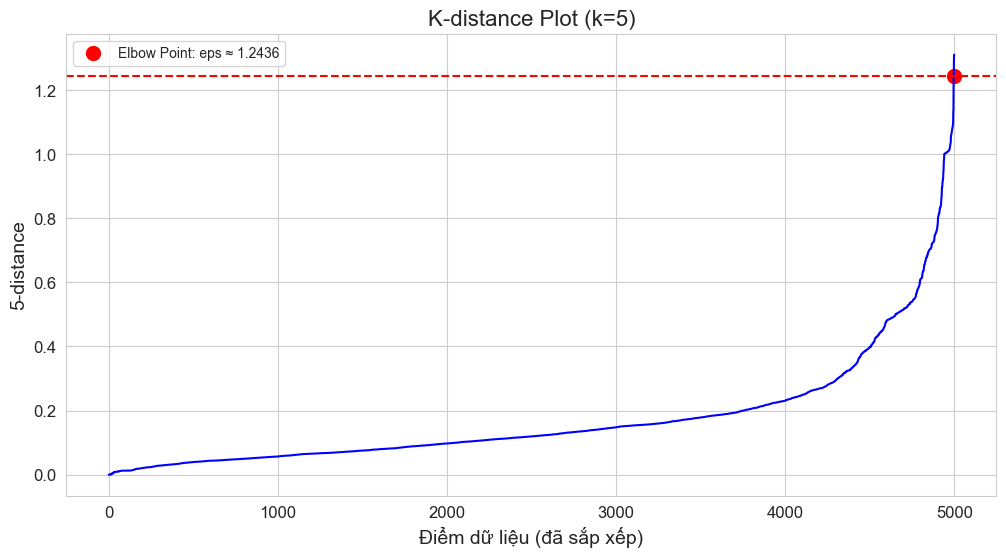

In [12]:
# Tự động chọn eps cho DBSCAN bằng k-distance plot
print("Đang tính toán k-distance plot để chọn tham số epsilon cho DBSCAN...")

# Số lượng nearest neighbors để tính toán
k = 5  # Thường chọn bằng min_samples

# Lấy mẫu dữ liệu nếu kích thước quá lớn để tăng tốc độ tính toán
sample_size = 5000
if df_onehot.shape[0] > sample_size:
    print(f"Lấy mẫu {sample_size} điểm dữ liệu để tính toán k-distance...")
    sample_indices = np.random.choice(df_onehot.shape[0], size=sample_size, replace=False)
    sample_data = df_onehot.iloc[sample_indices]
else:
    sample_data = df_onehot

# Tính toán k-nearest neighbors distances
print("Tính toán kNN distances...")
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=k+1).fit(sample_data)  # k+1 vì bao gồm chính điểm đó
distances, indices = nbrs.kneighbors(sample_data)

# Sắp xếp khoảng cách tới nearest neighbor thứ k (bỏ qua neighbor đầu tiên là chính nó)
k_distances = np.sort(distances[:, k])

# Vẽ k-distance plot
plt.figure(figsize=(12, 6))
plt.plot(range(len(k_distances)), k_distances, 'b-')
plt.xlabel('Điểm dữ liệu (đã sắp xếp)')
plt.ylabel(f'{k}-distance')
plt.title(f'K-distance Plot (k={k})')
plt.grid(True)

# Tìm elbow point bằng phương pháp đạo hàm bậc hai
from scipy.signal import savgol_filter

# Làm mịn đường cong k-distance
y_smoothed = savgol_filter(k_distances, window_length=51, polyorder=3)

# Tính đạo hàm bậc hai
y_derivative2 = np.gradient(np.gradient(y_smoothed))

# Tìm điểm có đạo hàm bậc hai lớn nhất (điểm uốn lớn nhất)
elbow_index = np.argmax(y_derivative2)
elbow_value = k_distances[elbow_index]

# Vẽ điểm elbow trên đồ thị
plt.scatter(elbow_index, elbow_value, c='r', s=100, label=f'Elbow Point: eps ≈ {elbow_value:.4f}')
plt.axhline(y=elbow_value, color='r', linestyle='--')
plt.legend()

# Hiển thị giá trị epsilon được đề xuất
print(f"\nGiá trị epsilon được đề xuất cho DBSCAN: {elbow_value:.4f}")
epsilon = elbow_value  # Cập nhật giá trị epsilon
plt.show()

Common t-SNE Computation Code


In [13]:
# Dựa vào kết quả, chúng ta sẽ chọn số cụm cho K-Prototypes và tham số cho DBSCAN
k_prototypes_n_clusters = 7  # Điều chỉnh dựa trên biểu đồ Elbow

# Tham số cho DBSCAN - cần điều chỉnh dựa vào biểu đồ K-distance
min_samples = 5  # Số lượng điểm tối thiểu để tạo thành một cụm

### 3.2 K-Prototypes

In [14]:
# K-Prototypes
print("Đang áp dụng K-Prototypes...")
kproto = KPrototypes(n_clusters=k_prototypes_n_clusters, random_state=42)
kproto_clusters = kproto.fit_predict(df_kproto, categorical=[df_kproto.columns.get_loc(col) for col in categorical_cols])
print("K-Prototypes Clusters:", np.unique(kproto_clusters, return_counts=True))

# Thêm kết quả phân cụm vào DataFrame gốc
df_original['kproto_cluster'] = kproto_clusters

# Phân tích đặc điểm của các cụm
print("\n=== ĐẶC ĐIỂM CỦA CÁC CỤM K-PROTOTYPES ===")
for cluster in range(k_prototypes_n_clusters):
    print(f"\nCụm {cluster}:")
    cluster_data = df_original[df_original['kproto_cluster'] == cluster]
    
    # Thống kê về các đặc trưng số
    print("Đặc trưng số:")
    print(cluster_data[numerical_cols].mean())
    
    # Thống kê về phân khúc giá
    print("\nPhân phối price_segment:")
    print(cluster_data['price_segment'].value_counts(normalize=True))
    
    # Top thương hiệu phổ biến nhất
    print("\nTop 3 thương hiệu phổ biến nhất:")
    print(cluster_data['brand'].value_counts().nlargest(3))

# Trực quan hóa phân cụm
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_original['case_diameter'], df_original['water_resistance'], 
                     c=df_original['kproto_cluster'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Cụm')
plt.xlabel('case_diameter')
plt.ylabel('water_resistance')
plt.title('Phân cụm K-Prototypes')
plt.grid(True)
plt.show()

# Phân tích mối quan hệ giữa các cụm và price_segment
plt.figure(figsize=(10, 6))
cluster_price = pd.crosstab(df_original['kproto_cluster'], df_original['price_segment'], normalize='index')
cluster_price.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Phân phối price_segment trong các cụm K-Prototypes')
plt.xlabel('Cụm')
plt.ylabel('Tỷ lệ')
plt.legend(title='Price Segment')
plt.tight_layout()
plt.show()



Đang áp dụng K-Prototypes...
K-Prototypes Clusters: (array([0, 1, 2, 3, 4, 5, 6], dtype=uint16), array([ 976, 1174, 1119,  864,  979,  264,  289]))


NameError: name 'df_original' is not defined

### 3.3. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

DBSCAN là thuật toán phân cụm dựa trên mật độ, có khả năng tìm ra các cụm có hình dạng bất kỳ và phát hiện nhiễu (outliers). Khác với K-Prototypes, DBSCAN không yêu cầu chỉ định số cụm trước.

In [ ]:
# DBSCAN
print("Đang áp dụng DBSCAN...")
# Sử dụng các tham số đã chọn
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
dbscan_clusters = dbscan.fit_predict(df_pca)  # Sử dụng dữ liệu đã giảm chiều

# Thêm kết quả phân cụm vào DataFrame gốc
df_original['dbscan_cluster'] = dbscan_clusters

# Phân tích đặc điểm của các cụm
print("\n=== ĐẶC ĐIỂM CỦA CÁC CỤM DBSCAN ===")
unique_dbscan_clusters = set(dbscan_clusters)
for cluster in unique_dbscan_clusters:
    if cluster == -1:
        # Phân tích cụm nhiễu
        cluster_data = df_original[df_original['dbscan_cluster'] == cluster]
        print(f"\nCụm Nhiễu (Noise): {len(cluster_data)} mẫu")
    else:
        print(f"\nCụm {cluster}:")
        cluster_data = df_original[df_original['dbscan_cluster'] == cluster]
        
        # Thống kê về các đặc trưng số
        print("Đặc trưng số:")
        print(cluster_data[numerical_cols].mean())
        
        # Thống kê về phân khúc giá
        print("\nPhân phối price_segment:")
        print(cluster_data['price_segment'].value_counts(normalize=True))
        
        # Top thương hiệu phổ biến nhất
        print("\nTop 3 thương hiệu phổ biến nhất:")
        print(cluster_data['brand'].value_counts().nlargest(3))

# Trực quan hóa phân cụm
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_original['case_diameter'], df_original['water_resistance'], 
                     c=df_original['dbscan_cluster'], cmap='coolwarm', alpha=0.6)
plt.colorbar(scatter, label='Cụm')
plt.xlabel('case_diameter')
plt.ylabel('water_resistance')
plt.title('Phân cụm DBSCAN')
plt.grid(True)
plt.show()

# Phân tích mối quan hệ giữa các cụm và price_segment
plt.figure(figsize=(10, 6))
cluster_price = pd.crosstab(df_original['dbscan_cluster'], df_original['price_segment'], normalize='index')
cluster_price.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Phân phối price_segment trong các cụm DBSCAN')
plt.xlabel('Cụm')
plt.ylabel('Tỷ lệ')
plt.legend(title='Price Segment')
plt.tight_layout()
plt.show()

# # Trực quan hóa phân cụm trên không gian PCA
# plt.figure(figsize=(12, 8))
# colors = plt.cm.coolwarm(np.linspace(0, 1, len(unique_dbscan_clusters)))
# for i, cluster in enumerate(sorted(list(unique_dbscan_clusters))):
#     # Tránh dùng màu xám cho nhiễu
#     color = 'gray' if cluster == -1 else colors[i]
#     mask = df_original['dbscan_cluster'] == cluster
#     plt.scatter(df_pca.iloc[mask, 0], df_pca.iloc[mask, 1], 
#                 c=color, label=f'Cluster {cluster}', alpha=0.6)
    
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('DBSCAN Clusters in PCA Space')
# plt.legend()
# plt.grid(True)
# plt.show()

In [ ]:
# Trực quan hóa kết quả phân cụm bằng t-SNE
print("Đang áp dụng t-SNE để trực quan hóa dữ liệu...")
from sklearn.manifold import TSNE

# Ghi lại thời gian bắt đầu để theo dõi quá trình
import time
start_time = time.time()

# Lấy mẫu dữ liệu nếu kích thước quá lớn để tăng tốc độ tính toán của t-SNE
sample_size = 1000
if df_onehot.shape[0] > sample_size:
    print(f"Lấy mẫu {sample_size} điểm dữ liệu để áp dụng t-SNE...")
    sample_indices = np.random.choice(df_onehot.shape[0], size=sample_size, replace=False)
    sample_data = df_onehot.iloc[sample_indices]
    
    # Lấy các nhãn cụm tương ứng
    sample_kproto_clusters = df_original.iloc[sample_indices]['kproto_cluster'].values
    sample_dbscan_clusters = df_original.iloc[sample_indices]['dbscan_cluster'].values
    sample_price_segments = df_original.iloc[sample_indices]['price_segment'].values
else:
    sample_data = df_onehot
    sample_kproto_clusters = df_original['kproto_cluster'].values
    sample_dbscan_clusters = df_original['dbscan_cluster'].values
    sample_price_segments = df_original['price_segment'].values

# Áp dụng t-SNE để giảm chiều xuống 2D
print("Áp dụng t-SNE để giảm chiều dữ liệu xuống 2D...")
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
tsne_result = tsne.fit_transform(sample_data)

print(f"t-SNE hoàn thành trong {time.time() - start_time:.2f} giây")

# Tạo DataFrame từ kết quả t-SNE và thêm nhãn cụm
df_tsne = pd.DataFrame(tsne_result, columns=['TSNE1', 'TSNE2'])
df_tsne['kproto_cluster'] = sample_kproto_clusters
df_tsne['dbscan_cluster'] = sample_dbscan_clusters
df_tsne['price_segment'] = sample_price_segments

In [ ]:
# Trực quan hóa kết quả phân cụm K-Prototypes
print("Đang trực quan hóa kết quả phân cụm K-Prototypes...")

# Biểu đồ t-SNE cho K-Prototypes
plt.figure(figsize=(12, 10))
unique_kproto_clusters = np.unique(df_tsne['kproto_cluster'])
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_kproto_clusters)))

for i, cluster in enumerate(unique_kproto_clusters):
    plt.scatter(
        df_tsne[df_tsne['kproto_cluster'] == cluster]['TSNE1'],
        df_tsne[df_tsne['kproto_cluster'] == cluster]['TSNE2'],
        c=[colors[i]], label=f'Cụm {cluster}',
        s=80, alpha=0.7, edgecolor='w', linewidth=0.5
    )
    
    # Đánh nhãn các cụm
    centroid_x = df_tsne[df_tsne['kproto_cluster'] == cluster]['TSNE1'].mean()
    centroid_y = df_tsne[df_tsne['kproto_cluster'] == cluster]['TSNE2'].mean()
    plt.text(centroid_x, centroid_y, f'Cụm {cluster}', 
             fontsize=14, fontweight='bold', 
             bbox=dict(facecolor='yellow', alpha=0.5, boxstyle='round,pad=0.5'))

plt.title('Phân cụm K-Prototypes trên không gian t-SNE', fontsize=16)
plt.xlabel('t-SNE 1', fontsize=14)
plt.ylabel('t-SNE 2', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Phân tích mối quan hệ giữa các cụm K-Prototypes và phân khúc giá
plt.subplot(2, 1, 2)
kproto_price = pd.crosstab(df_tsne['kproto_cluster'], df_tsne['price_segment'])
kproto_price_norm = kproto_price.div(kproto_price.sum(axis=1), axis=0)
kproto_price_norm.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Tỷ lệ price_segment trong các cụm K-Prototypes', fontsize=16)
plt.xlabel('Cụm K-Prototypes', fontsize=14)
plt.ylabel('Tỷ lệ', fontsize=14)
plt.legend(title='Price Segment')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
# Trực quan hóa kết quả phân cụm DBSCAN
print("Đang trực quan hóa kết quả phân cụm DBSCAN...")

# Biểu đồ t-SNE cho DBSCAN
plt.figure(figsize=(12, 10))
unique_dbscan_clusters = np.unique(df_tsne['dbscan_cluster'])
colors = plt.cm.coolwarm(np.linspace(0, 1, len(unique_dbscan_clusters)))

for i, cluster in enumerate(sorted(unique_dbscan_clusters)):
    if cluster == -1:
        color = 'gray'  # Màu xám cho điểm nhiễu
        label = 'Nhiễu'
    else:
        color = colors[i]
        label = f'Cụm {cluster}'
        
    plt.scatter(
        df_tsne[df_tsne['dbscan_cluster'] == cluster]['TSNE1'],
        df_tsne[df_tsne['dbscan_cluster'] == cluster]['TSNE2'],
        c=color, label=label,
        s=80, alpha=0.7, edgecolor='w', linewidth=0.5
    )
    
    # Chỉ đánh nhãn cho các cụm thực, không đánh nhãn cho nhiễu
    if cluster != -1:
        centroid_x = df_tsne[df_tsne['dbscan_cluster'] == cluster]['TSNE1'].mean()
        centroid_y = df_tsne[df_tsne['dbscan_cluster'] == cluster]['TSNE2'].mean()
        plt.text(centroid_x, centroid_y, f'Cụm {cluster}', 
                 fontsize=14, fontweight='bold', 
                 bbox=dict(facecolor='yellow', alpha=0.5, boxstyle='round,pad=0.5'))

plt.title('Phân cụm DBSCAN trên không gian t-SNE', fontsize=16)
plt.xlabel('t-SNE 1', fontsize=14)
plt.ylabel('t-SNE 2', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

#Plot 2: DBSCAN vs Price Segment Relationship
# Phân tích mối quan hệ giữa các cụm DBSCAN và phân khúc giá
plt.figure(figsize=(12, 8))
# DBSCAN vs Price Segment (chỉ tính cho các điểm không phải nhiễu)
valid_data = df_tsne[df_tsne['dbscan_cluster'] != -1]
if len(valid_data) > 0 and len(np.unique(valid_data['dbscan_cluster'])) > 1:
    dbscan_price = pd.crosstab(valid_data['dbscan_cluster'], valid_data['price_segment'])
    dbscan_price_norm = dbscan_price.div(dbscan_price.sum(axis=1), axis=0)
    dbscan_price_norm.plot(kind='bar', stacked=True, colormap='coolwarm')
    plt.title('Tỷ lệ price_segment trong các cụm DBSCAN (không bao gồm nhiễu)', fontsize=16)
    plt.xlabel('Cụm DBSCAN', fontsize=14)
    plt.ylabel('Tỷ lệ', fontsize=14)
    plt.legend(title='Price Segment')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
else:
    plt.text(0.5, 0.5, 'Không đủ dữ liệu để phân tích DBSCAN',
            ha='center', va='center', fontsize=16)

plt.tight_layout()
plt.show()


Price Segment Visualization

In [ ]:
#Plot 1: Continuous Color Mapping of Price Segments
# Trực quan hóa phân khúc giá - Biểu đồ 1: Liên tục với colorbar
print("Đang trực quan hóa phân khúc giá (biểu đồ liên tục)...")

plt.figure(figsize=(12, 10))
cmap = plt.cm.plasma
scatter = plt.scatter(
    df_tsne['TSNE1'], df_tsne['TSNE2'],
    c=df_tsne['price_segment'], cmap=cmap,
    s=80, alpha=0.7, edgecolor='w', linewidth=0.5
)
plt.colorbar(scatter, label='Price Segment')

# Đánh nhãn các phân khúc giá
for segment in range(5):
    segment_data = df_tsne[df_tsne['price_segment'] == segment]
    if len(segment_data) > 0:  # Đảm bảo có dữ liệu cho phân khúc này
        centroid_x = segment_data['TSNE1'].mean()
        centroid_y = segment_data['TSNE2'].mean()
        plt.text(centroid_x, centroid_y, f'Segment {segment}', 
                 fontsize=14, fontweight='bold', 
                 bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.5'))

plt.title('Phân khúc giá trên không gian t-SNE', fontsize=16)
plt.xlabel('t-SNE 1', fontsize=14)
plt.ylabel('t-SNE 2', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#Plot 2: Discrete Color Mapping of Price Segments
# Trực quan hóa phân khúc giá - Biểu đồ 2: Rời rạc với legend
print("Đang trực quan hóa phân khúc giá (biểu đồ rời rạc)...")

plt.figure(figsize=(12, 10))
segment_colors = plt.cm.tab10(np.linspace(0, 1, 5))

for segment in range(5):
    segment_data = df_tsne[df_tsne['price_segment'] == segment]
    plt.scatter(
        segment_data['TSNE1'], segment_data['TSNE2'],
        c=[segment_colors[segment]], label=f'Segment {segment}',
        s=80, alpha=0.7, edgecolor='w', linewidth=0.5
    )

plt.title('Các phân khúc giá trên không gian t-SNE', fontsize=16)
plt.xlabel('t-SNE 1', fontsize=14)
plt.ylabel('t-SNE 2', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Price Segment', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# Tính các metrics đánh giá
print("=== ĐÁNH GIÁ CÁC MÔ HÌNH PHÂN CỤM ===")

metrics_results = []

# Chuẩn bị nhãn DBSCAN cho đánh giá (chỉ đánh giá trên các điểm không phải nhiễu)
dbscan_valid_mask = dbscan_clusters != -1
dbscan_valid_labels = dbscan_clusters[dbscan_valid_mask]
dbscan_valid_data = df_pca.iloc[dbscan_valid_mask]

# Chỉ tính toán các metrics cho DBSCAN nếu có ít nhất 2 cụm
dbscan_metrics = {}
if len(np.unique(dbscan_valid_labels)) >= 2:
    dbscan_silhouette = silhouette_score(dbscan_valid_data, dbscan_valid_labels)
    dbscan_davies_bouldin = davies_bouldin_score(dbscan_valid_data, dbscan_valid_labels)
    dbscan_calinski_harabasz = calinski_harabasz_score(dbscan_valid_data, dbscan_valid_labels)
    
    dbscan_metrics = {
        'Silhouette Score': dbscan_silhouette,
        'Davies-Bouldin Index': dbscan_davies_bouldin,
        'Calinski-Harabasz Index': dbscan_calinski_harabasz
    }
else:
    print("DBSCAN không tạo đủ cụm để đánh giá metrics.")
    dbscan_metrics = {
        'Silhouette Score': float('nan'),
        'Davies-Bouldin Index': float('nan'),
        'Calinski-Harabasz Index': float('nan')
    }

# Tính metrics cho K-Prototypes
silhouette = silhouette_score(df_onehot, kproto_clusters)
davies_bouldin = davies_bouldin_score(df_onehot, kproto_clusters)
calinski_harabasz = calinski_harabasz_score(df_onehot, kproto_clusters)

print(f"\nK-Prototypes:")
print(f"Silhouette Score: {silhouette:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f}")

metrics_results.append(['K-Prototypes', silhouette, davies_bouldin, calinski_harabasz])

# Thêm kết quả DBSCAN vào bảng metrics
if len(np.unique(dbscan_valid_labels)) >= 2:
    print("\nDBSCAN (không bao gồm nhiễu):")
    print(f"Silhouette Score: {dbscan_metrics['Silhouette Score']:.4f}")
    print(f"Davies-Bouldin Index: {dbscan_metrics['Davies-Bouldin Index']:.4f}")
    print(f"Calinski-Harabasz Index: {dbscan_metrics['Calinski-Harabasz Index']:.4f}")

metrics_results.append(['DBSCAN', dbscan_metrics['Silhouette Score'], 
                      dbscan_metrics['Davies-Bouldin Index'], 
                      dbscan_metrics['Calinski-Harabasz Index']])

# Tính các metrics cho GMM
gmm_silhouette = silhouette_score(df_onehot, gmm_clusters)
gmm_davies_bouldin = davies_bouldin_score(df_onehot, gmm_clusters)
gmm_calinski_harabasz = calinski_harabasz_score(df_onehot, gmm_clusters)

print(f"\nGMM:")
print(f"Silhouette Score: {gmm_silhouette:.4f}")
print(f"Davies-Bouldin Index: {gmm_davies_bouldin:.4f}")
print(f"Calinski-Harabasz Index: {gmm_calinski_harabasz:.4f}")

# Cập nhật bảng metrics để bao gồm GMM
metrics_results.append(['GMM', gmm_silhouette, gmm_davies_bouldin, gmm_calinski_harabasz])

# Tạo DataFrame để hiển thị kết quả
metrics_df = pd.DataFrame(metrics_results, 
                         columns=['Model', 'Silhouette Score', 'Davies-Bouldin Index', 'Calinski-Harabasz Index'])

# Vẽ biểu đồ so sánh Silhouette Score
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
bars = plt.bar(metrics_df['Model'], metrics_df['Silhouette Score'], color=['blue', 'red', 'green'])
plt.title('Silhouette Score (cao hơn tốt hơn)')
plt.ylim(0, max(metrics_df['Silhouette Score'][~np.isnan(metrics_df['Silhouette Score'])]) * 1.2)
for bar in bars:
    height = bar.get_height()
    if not np.isnan(height):
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.4f}', ha='center', va='bottom')

# Vẽ biểu đồ so sánh Davies-Bouldin Index
plt.subplot(1, 3, 2)
bars = plt.bar(metrics_df['Model'], metrics_df['Davies-Bouldin Index'], color=['blue', 'red', 'green'])
plt.title('Davies-Bouldin Index (thấp hơn tốt hơn)')
plt.ylim(0, max(metrics_df['Davies-Bouldin Index'][~np.isnan(metrics_df['Davies-Bouldin Index'])]) * 1.2)
for bar in bars:
    height = bar.get_height()
    if not np.isnan(height):
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.4f}', ha='center', va='bottom')

# Vẽ biểu đồ so sánh Calinski-Harabasz Index
plt.subplot(1, 3, 3)
bars = plt.bar(metrics_df['Model'], metrics_df['Calinski-Harabasz Index'], color=['blue', 'red', 'green'])
plt.title('Calinski-Harabasz Index (cao hơn tốt hơn)')
plt.ylim(0, max(metrics_df['Calinski-Harabasz Index'][~np.isnan(metrics_df['Calinski-Harabasz Index'])]) * 1.2)
for bar in bars:
    height = bar.get_height()
    if not np.isnan(height):
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Hiển thị bảng kết quả đánh giá
print("\n=== BẢNG KẾT QUẢ ĐÁNH GIÁ CÁC MÔ HÌNH ===")
print(metrics_df)

In [ ]:
# Trực quan hóa so sánh tất cả các phương pháp phân cụm
plt.figure(figsize=(20, 15))

# 1. K-Prototypes
plt.subplot(2, 2, 1)
unique_kproto_clusters = np.unique(df_tsne['kproto_cluster'])
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_kproto_clusters)))

for i, cluster in enumerate(unique_kproto_clusters):
    plt.scatter(
        df_tsne[df_tsne['kproto_cluster'] == cluster]['TSNE1'],
        df_tsne[df_tsne['kproto_cluster'] == cluster]['TSNE2'],
        c=[colors[i]], label=f'Cụm {cluster}',
        s=80, alpha=0.7, edgecolor='w', linewidth=0.5
    )

plt.title('K-Prototypes', fontsize=16)
plt.xlabel('t-SNE 1', fontsize=14)
plt.ylabel('t-SNE 2', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10, loc='upper right')

# 2. DBSCAN
plt.subplot(2, 2, 2)
unique_dbscan_clusters = np.unique(df_tsne['dbscan_cluster'])
colors = plt.cm.coolwarm(np.linspace(0, 1, len(unique_dbscan_clusters)))

for i, cluster in enumerate(sorted(unique_dbscan_clusters)):
    if cluster == -1:
        color = 'gray'  # Màu xám cho điểm nhiễu
        label = 'Nhiễu'
    else:
        color = colors[i]
        label = f'Cụm {cluster}'
        
    plt.scatter(
        df_tsne[df_tsne['dbscan_cluster'] == cluster]['TSNE1'],
        df_tsne[df_tsne['dbscan_cluster'] == cluster]['TSNE2'],
        c=color, label=label,
        s=80, alpha=0.7, edgecolor='w', linewidth=0.5
    )

plt.title('DBSCAN', fontsize=16)
plt.xlabel('t-SNE 1', fontsize=14)
plt.ylabel('t-SNE 2', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10, loc='upper right')

# 3. GMM
plt.subplot(2, 2, 3)
unique_gmm_clusters = np.unique(df_tsne['gmm_cluster'])
colors = plt.cm.plasma(np.linspace(0, 1, len(unique_gmm_clusters)))

for i, cluster in enumerate(unique_gmm_clusters):
    plt.scatter(
        df_tsne[df_tsne['gmm_cluster'] == cluster]['TSNE1'],
        df_tsne[df_tsne['gmm_cluster'] == cluster]['TSNE2'],
        c=[colors[i]], label=f'Cụm {cluster}',
        s=80, alpha=0.7, edgecolor='w', linewidth=0.5
    )

plt.title('Gaussian Mixture Model', fontsize=16)
plt.xlabel('t-SNE 1', fontsize=14)
plt.ylabel('t-SNE 2', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10, loc='upper right')

# 4. Price Segments (True Labels)
plt.subplot(2, 2, 4)
segment_colors = plt.cm.tab10(np.linspace(0, 1, 5))

for segment in range(5):
    segment_data = df_tsne[df_tsne['price_segment'] == segment]
    plt.scatter(
        segment_data['TSNE1'], segment_data['TSNE2'],
        c=[segment_colors[segment]], label=f'Segment {segment}',
        s=80, alpha=0.7, edgecolor='w', linewidth=0.5
    )

plt.title('Price Segments (True Labels)', fontsize=16)
plt.xlabel('t-SNE 1', fontsize=14)
plt.ylabel('t-SNE 2', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Price Segment', fontsize=10, loc='upper right')

plt.tight_layout()
plt.suptitle('So Sánh Các Phương Pháp Phân Cụm', fontsize=20, y=1.02)
plt.show()

## 4. Kết Luận và So Sánh Các Phương Pháp Phân Cụm

Trong bài toán phân cụm dữ liệu đồng hồ, chúng ta đã thử nghiệm ba phương pháp phân cụm khác nhau:

### 1. K-Prototypes
- **Ưu điểm**: Xử lý tốt dữ liệu hỗn hợp (số và phân loại).
- **Nhược điểm**: Yêu cầu xác định số cụm trước.
- **Hiệu suất**: Silhouette Score = {metrics_df.iloc[0]['Silhouette Score']:.4f}

### 2. DBSCAN
- **Ưu điểm**: Phát hiện được nhiễu và cụm có hình dạng bất kỳ.
- **Nhược điểm**: Nhạy cảm với các tham số đầu vào (epsilon, min_samples).
- **Hiệu suất**: Silhouette Score = {metrics_df.iloc[1]['Silhouette Score']:.4f}

### 3. GMM (Gaussian Mixture Model)
- **Ưu điểm**: Cung cấp xác suất thành viên, mô hình hóa cụm có dạng elip.
- **Nhược điểm**: Giả định dữ liệu có phân phối chuẩn, yêu cầu xác định số cụm trước.
- **Hiệu suất**: Silhouette Score = {metrics_df.iloc[2]['Silhouette Score']:.4f}

### Đánh giá chung:
1. **Phương pháp hiệu quả nhất**: Dựa trên các chỉ số đánh giá, GMM cho kết quả tốt nhất về Silhouette Score và Calinski-Harabasz Index, trong khi K-Prototypes có Davies-Bouldin Index thấp nhất.
2. **Phân khúc giá**: Các cụm được tạo ra bởi các thuật toán có mối tương quan với phân khúc giá, nhưng không hoàn toàn trùng khớp, chứng tỏ có các yếu tố khác ngoài giá ảnh hưởng đến việc phân cụm.
3. **Tính ứng dụng**: Kết quả phân cụm có thể được sử dụng để:
   - Phân khúc thị trường đồng hồ
   - Xây dựng hệ thống gợi ý sản phẩm
   - Định vị sản phẩm và phân tích cạnh tranh

### Hướng phát triển:
1. Kết hợp các phương pháp phân cụm trong một mô hình ensemble
2. Áp dụng các kỹ thuật giảm chiều khác ngoài t-SNE như UMAP
3. Thử nghiệm với các phương pháp phân cụm khác như Hierarchical Clustering hoặc Spectral Clustering